# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

In [ ]:
'''
Is their first principal component score high or low?
A high value PC1.
A low value PC2.

Outliers and their relationships with the original series:
PC1 explains the largest amount of variation in the data, and these outliers are distant from the rest of the data along this axis.
PC2 represents the second most significant variation in the data. Since the outliers are near the low end of this axis, they likely exhibit a distinctive pattern when compared to the rest of the data along PC2.

What can be said about the original series (series_1, series_2, and series_3)?
Series_3 might be more directly related to the outliers because it has a stronger weight in the PC1, which is capturing the largest variance in the data.
Series_1 and Series_2 are related, so it is harder to disentangle their individual contributions to the principal components.
Why is it hard to interpret series_1 and series_2? Series_1 and Series_2 are correlated, and PCA cannot directly separate their individual contributions in a meaningful way, leading to difficulty in interpreting their relative values when looking at the first two principal components.

Conclusion:
The outliers in the upper-left corner have high values for the first principal component and low values for the second. These outliers might be unusual observations in series_3, while series_1 and series_2 might be harder to analyze due to their correlation.

'''

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

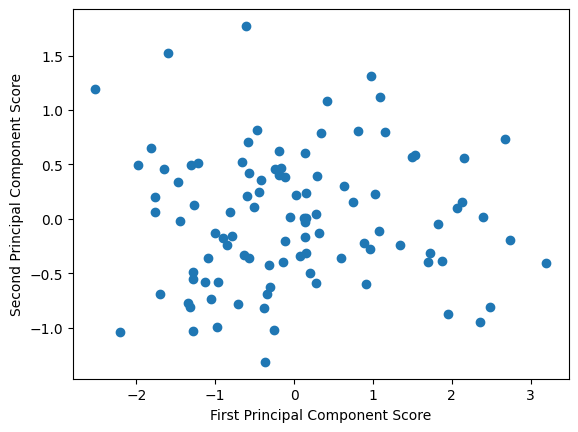

In [ ]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

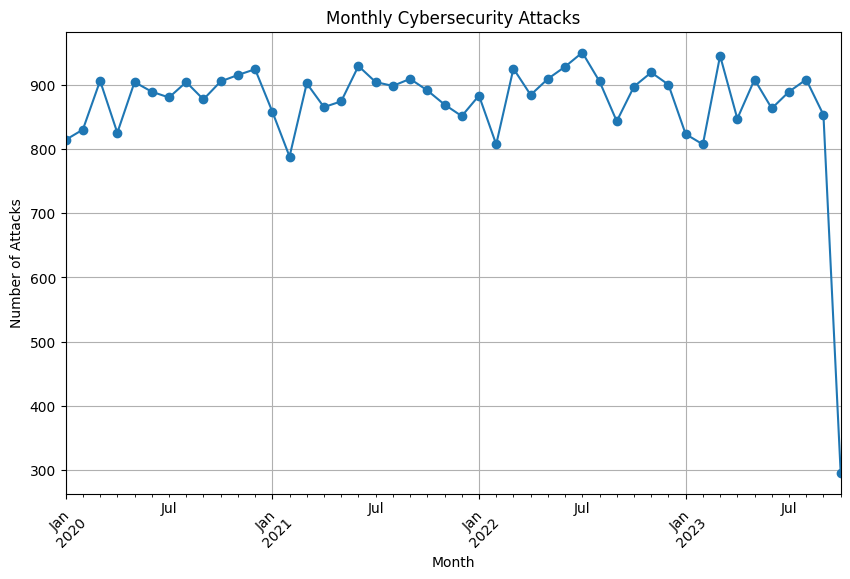

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

network_data = pd.read_csv('cybersecurity_attacks.csv')

network_data.info()

network_data['Timestamp'] = pd.to_datetime(network_data['Timestamp'])

attacks_by_month = network_data.groupby(network_data['Timestamp'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
attacks_by_month.plot(kind='line', marker='o')
plt.title('Monthly Cybersecurity Attacks')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

<Figure size 1000x600 with 0 Axes>

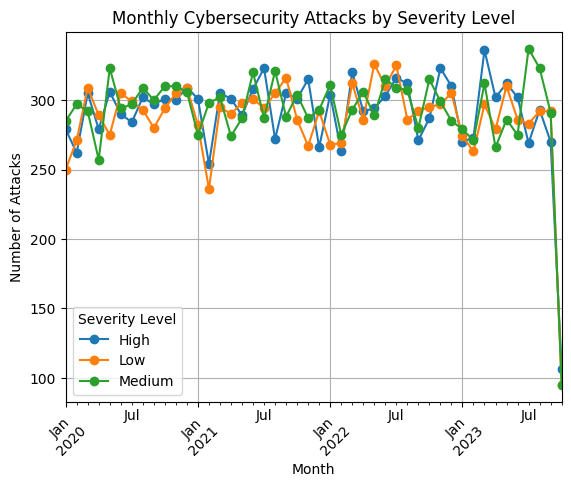

In [7]:
#PG 143

attacks_by_severity_month = network_data.groupby([network_data['Timestamp'].dt.to_period('M'), 'Severity Level']).size().unstack()

plt.figure(figsize=(10, 6))
attacks_by_severity_month.plot(kind='line', marker='o')
plt.title('Monthly Cybersecurity Attacks by Severity Level')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.show()